In [95]:
import tensorflow as tf

In [96]:
import os

In [97]:
os.listdir('srk_and_madhuri_filtered')

['.ipynb_checkpoints', 'train', 'validation']

In [98]:
os.listdir('srk_and_madhuri_filtered/train/srk_train/')

['.ipynb_checkpoints',
 'srk1.jpg',
 'srk10.jpg',
 'srk11.jpg',
 'srk12.jpg',
 'srk13.jpg',
 'srk14.jpg',
 'srk15.jpg',
 'srk2.jpg',
 'srk3.jpg',
 'srk4.jpeg',
 'srk5.jpg',
 'srk6.jpg',
 'srk7.jpg',
 'srk8.jpg',
 'srk9.jpg']

In [99]:
len(os.listdir('srk_and_madhuri_filtered/train/srk_train/'))

16

In [100]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

In [101]:
img1= load_img('srk_and_madhuri_filtered/train/madhuri_train/madhuri11.jpg')

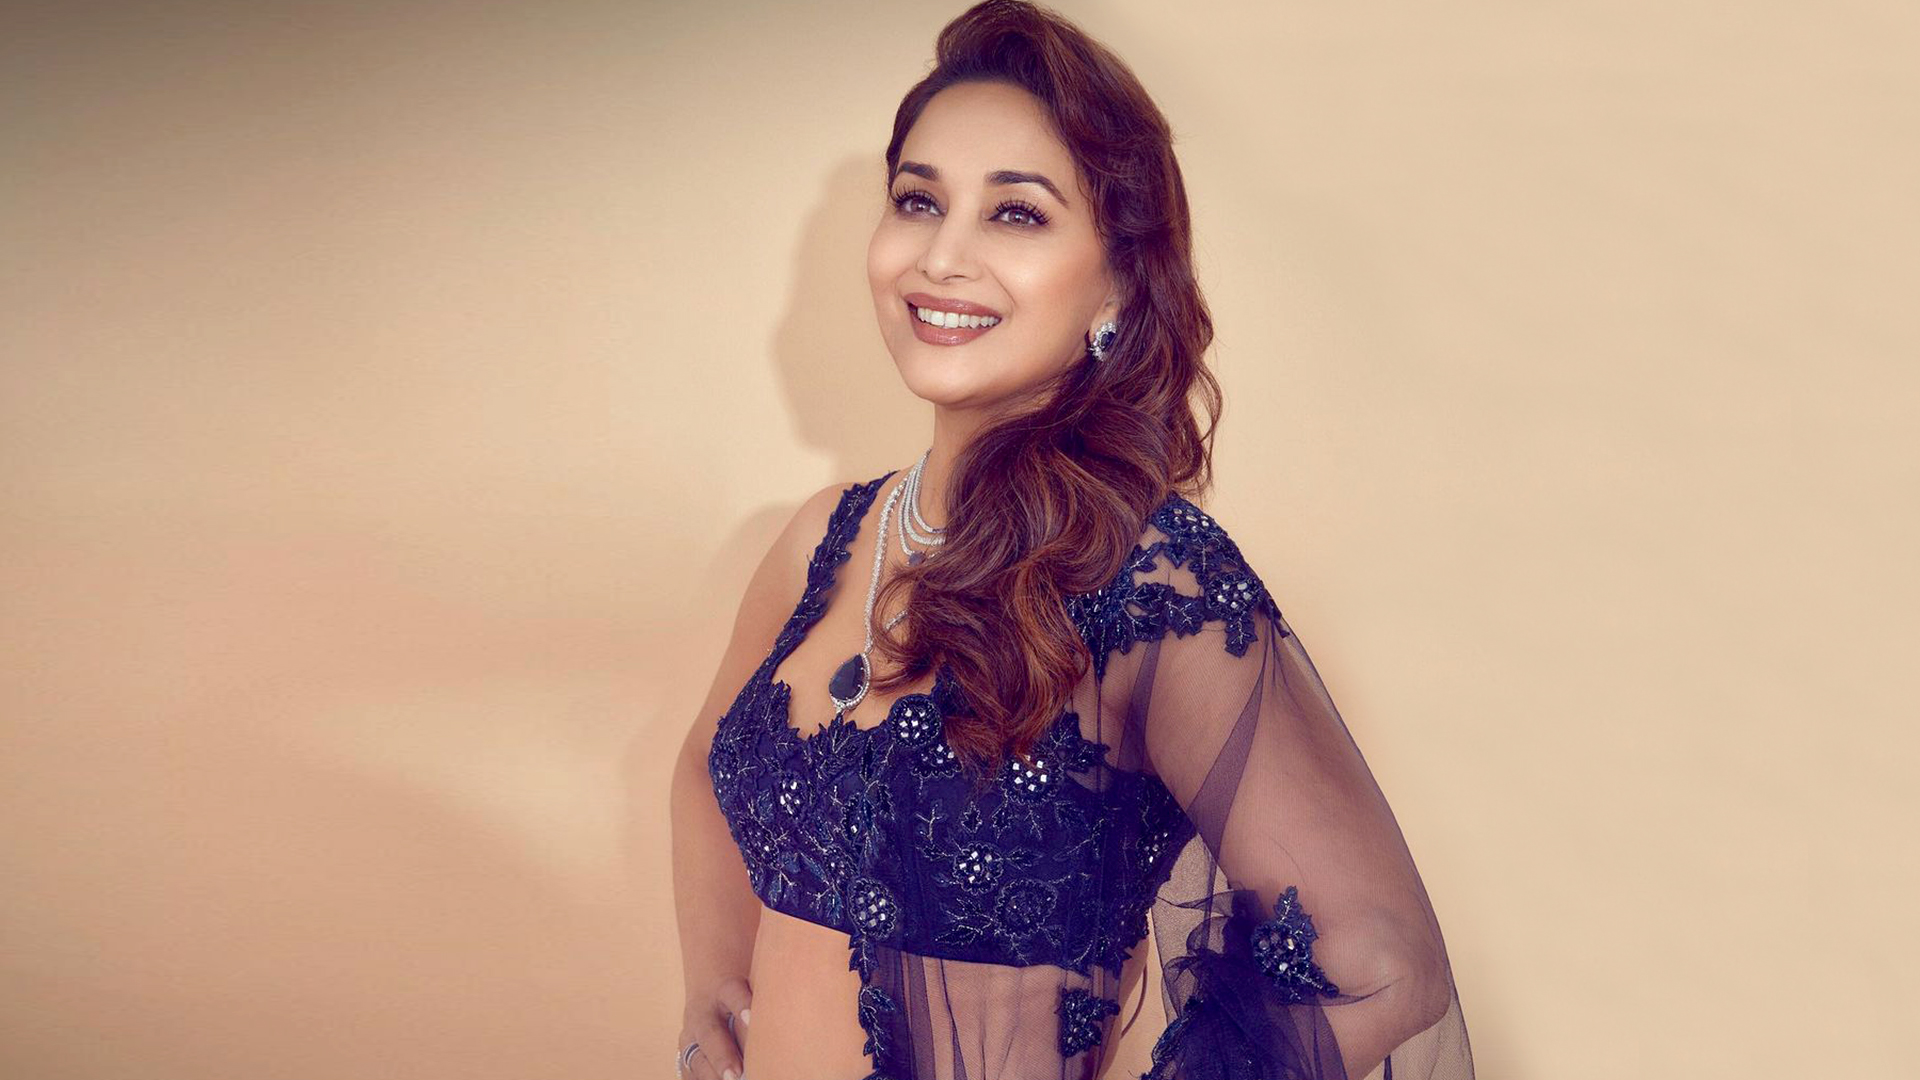

In [102]:
img1

In [103]:
img2= load_img('srk_and_madhuri_filtered/train/madhuri_train/madhuri14.jpg')

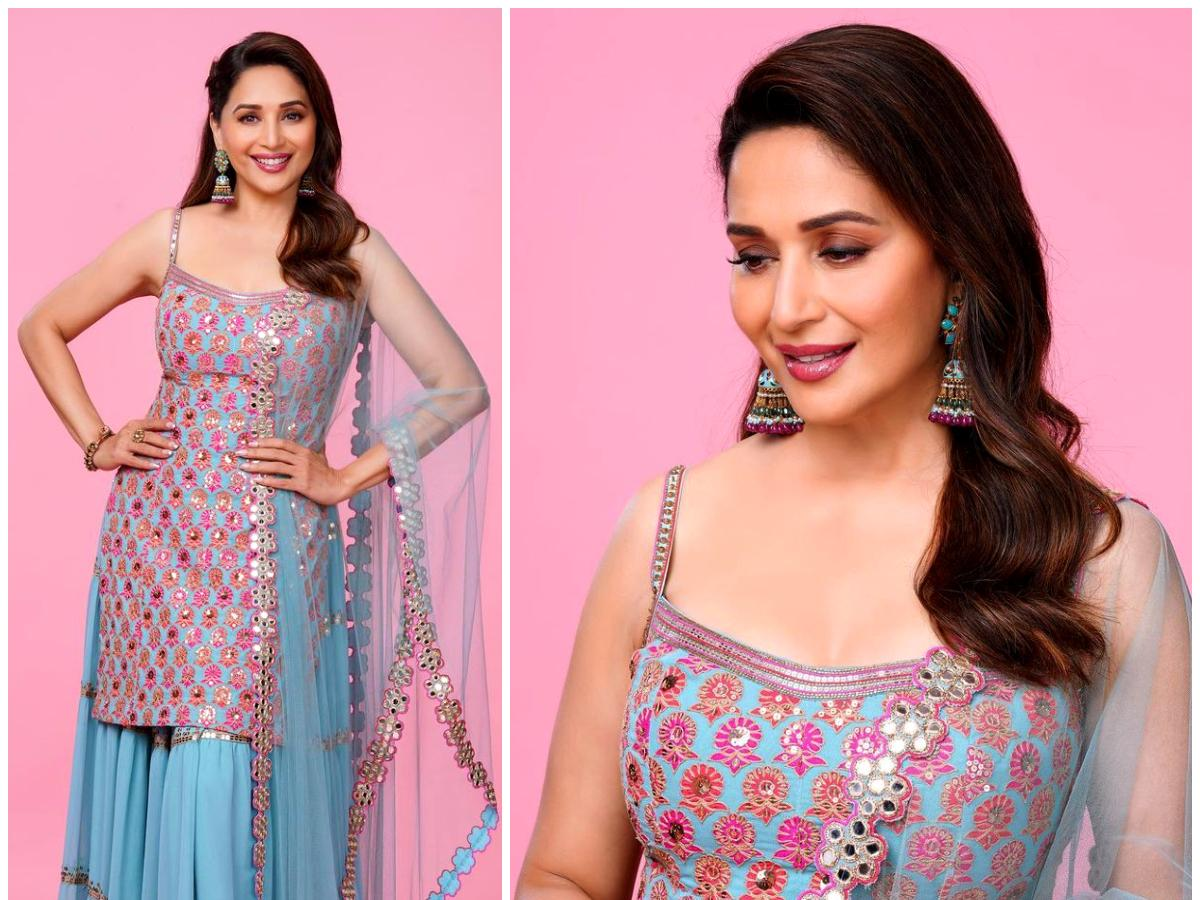

In [104]:
img2

In [105]:
img3= load_img('srk_and_madhuri_filtered/train/srk_train/srk14.jpg')

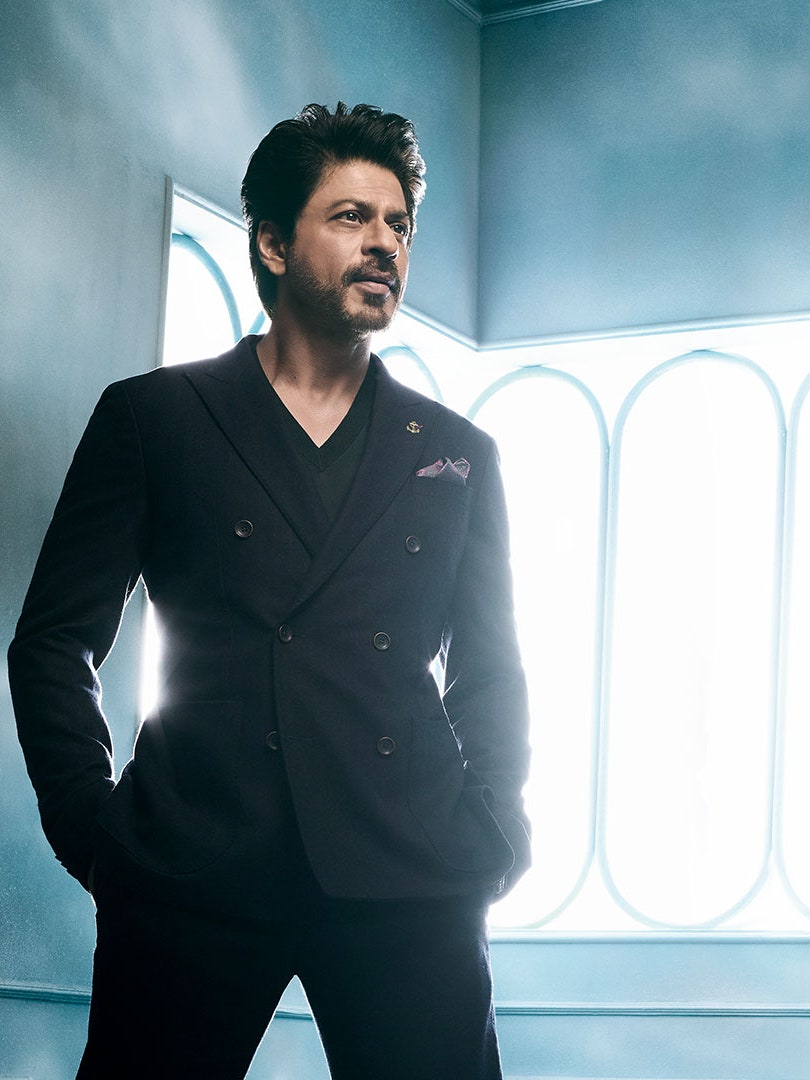

In [106]:
img3

In [107]:
img4= load_img('srk_and_madhuri_filtered/validation/madhuri_val/madhuri14.jpg')

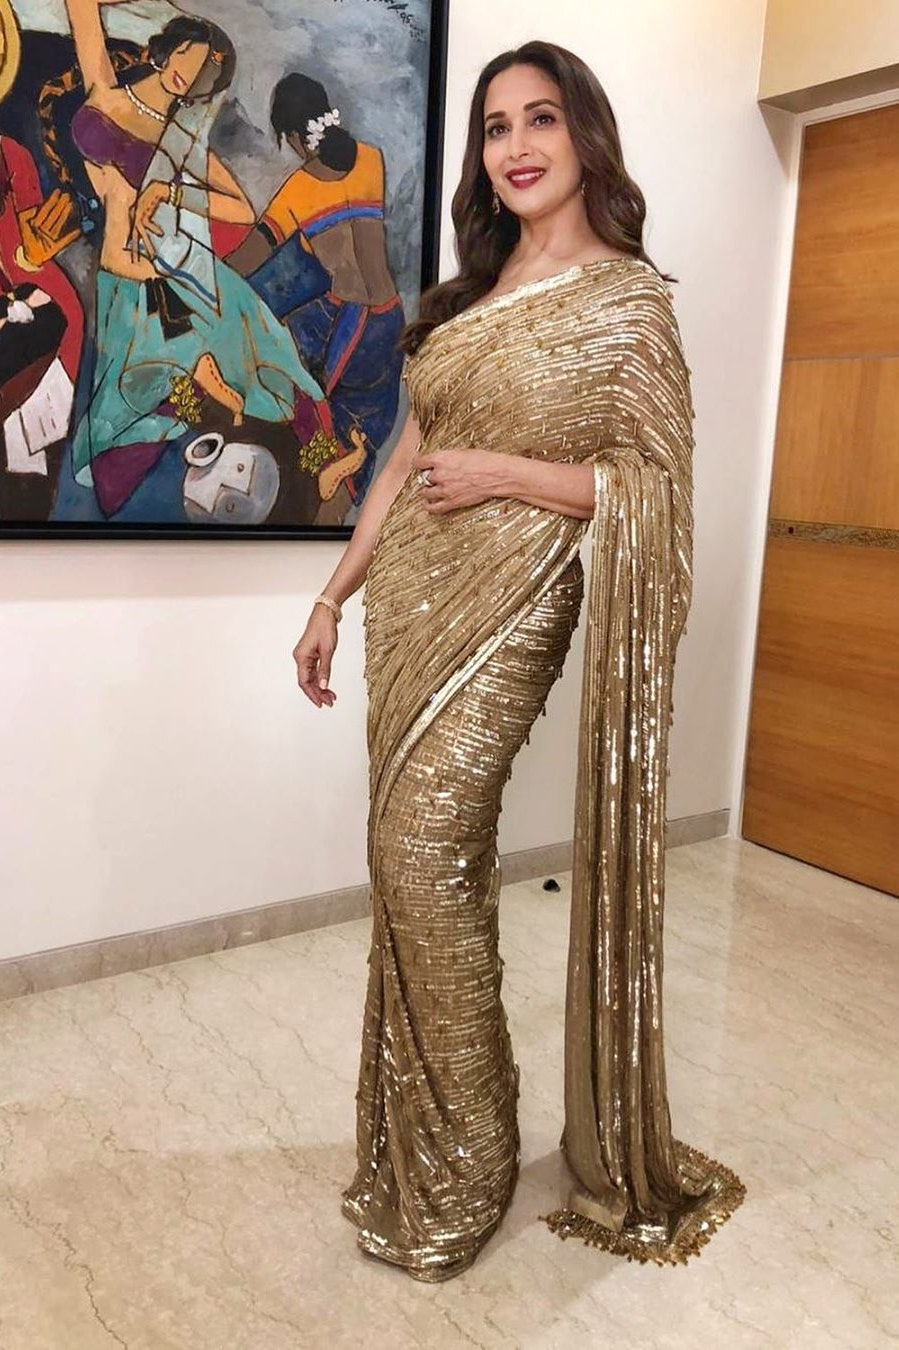

In [108]:
img4

In [109]:
img5= load_img('srk_and_madhuri_filtered/validation/srk_val/srk14.jpg')

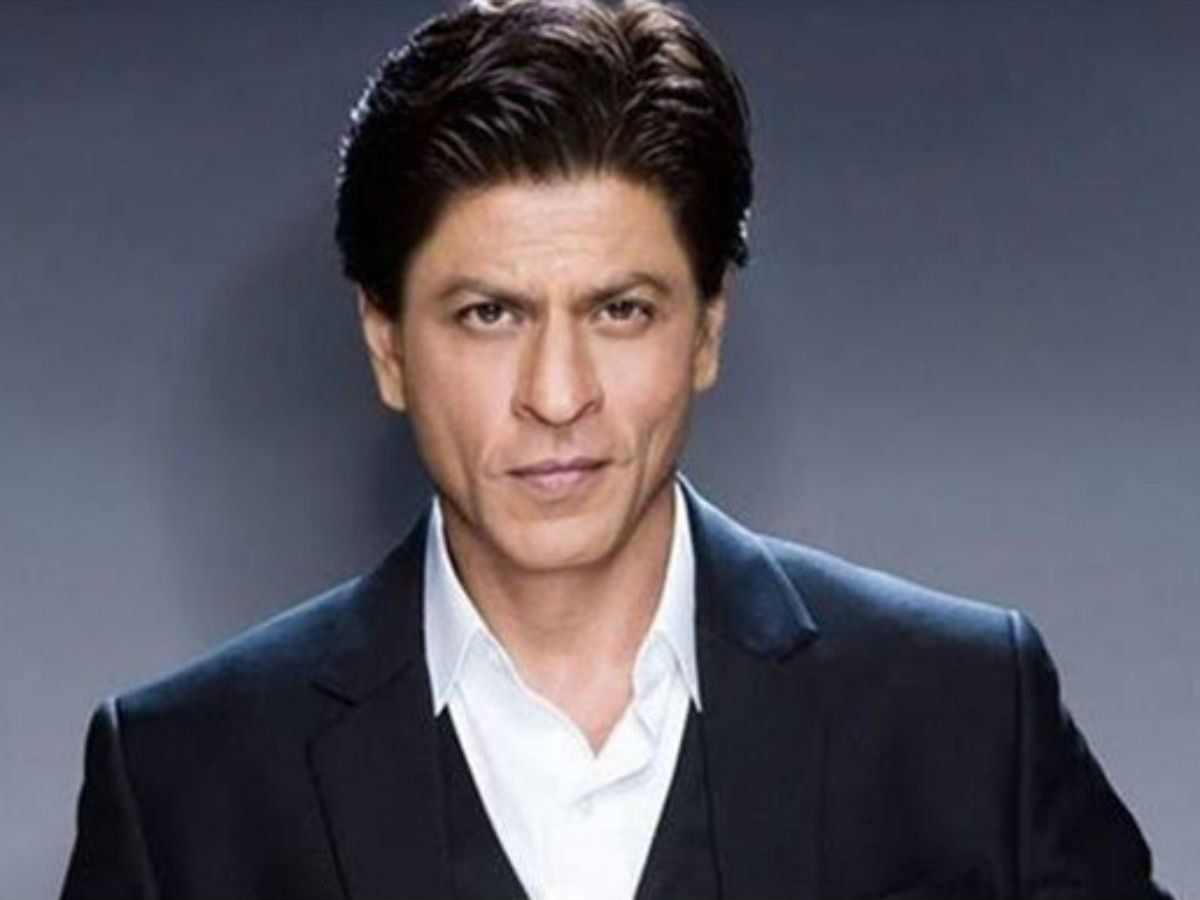

In [110]:
img5

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [112]:
path = os.path.join('srk_and_madhuri_filtered')

In [113]:
path

'srk_and_madhuri_filtered'

In [114]:
train_dir = os.path.join(path,'train')

In [115]:
train_dir

'srk_and_madhuri_filtered\\train'

In [116]:
validation_dir= os.path.join(path,'validation')

In [117]:
validation_dir

'srk_and_madhuri_filtered\\validation'

In [118]:
train_srk_dir = os.path.join(train_dir,'srk')
train_madhuri_dir = os.path.join(train_dir,'madhuri')

In [119]:
train_srk_dir

'srk_and_madhuri_filtered\\train\\srk'

In [120]:
train_madhuri_dir

'srk_and_madhuri_filtered\\train\\madhuri'

In [121]:
validation_srk_dir = os.path.join(validation_dir, 'srk')
validation_madhuri_dir = os.path.join(validation_dir, 'madhuri')

In [122]:
validation_madhuri_dir

'srk_and_madhuri_filtered\\validation\\madhuri'

In [123]:
validation_srk_dir

'srk_and_madhuri_filtered\\validation\\srk'

In [124]:
os.listdir('srk_and_madhuri_filtered/train/madhuri_train')

['.ipynb_checkpoints',
 'madhuri1.jpg',
 'madhuri10.jpg',
 'madhuri11.jpg',
 'madhuri12.jpg',
 'madhuri13.jpg',
 'madhuri14.jpg',
 'madhuri15.jpg',
 'madhuri2.jpg',
 'madhuri3.jpg',
 'madhuri4.jpg',
 'madhuri5.jpg',
 'madhuri6.jpg',
 'madhuri7.jpg',
 'madhuri8.jpg',
 'madhuri9.jpeg']

In [125]:
type(os.listdir('srk_and_madhuri_filtered/train/madhuri_train'))

list

In [126]:
len(os.listdir('srk_and_madhuri_filtered/train/madhuri_train'))

16

In [127]:
num_madhuri_tr = len(os.listdir('srk_and_madhuri_filtered/train/madhuri_train'))
num_srk_tr = len(os.listdir('srk_and_madhuri_filtered/train/srk_train'))
num_madhuri_val = len(os.listdir('srk_and_madhuri_filtered/validation/madhuri_val'))
num_srk_val = len(os.listdir('srk_and_madhuri_filtered/validation/srk_val'))
print('Madhuri Training Data ',num_madhuri_tr)
print('Srk training Data ',num_srk_tr)
print('Madhuri Validation data ',num_madhuri_val)
print('Srk Validation  data ',num_srk_val)

Madhuri Training Data  16
Srk training Data  16
Madhuri Validation data  7
Srk Validation  data  7


In [128]:
total_train=num_madhuri_tr+num_srk_tr
total_val=num_madhuri_val+num_srk_val
print('Total Training images',total_train)
print('Total validation images',total_val)

Total Training images 32
Total validation images 14


In [129]:
batch_size= 10
epochs = 10
IMG_HIEGHT = 150
IMG_WIDHT = 150

In [130]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [131]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                           class_mode='binary')

Found 30 images belonging to 2 classes.


In [132]:
train_data_gen.class_indices

{'madhuri_train': 0, 'srk_train': 1}

In [133]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                              class_mode='binary')

Found 12 images belonging to 2 classes.


In [134]:
sample_train_images, label = next(train_data_gen)

In [135]:
sample_train_images.shape

(10, 150, 150, 3)

In [136]:
label.shape

(10,)

In [137]:
label

array([1., 1., 0., 0., 1., 0., 1., 0., 1., 0.], dtype=float32)

In [138]:
sample_train_images

array([[[[0.8470589 , 0.6392157 , 0.5058824 ],
         [0.86274517, 0.67058825, 0.5411765 ],
         [0.882353  , 0.7137255 , 0.5882353 ],
         ...,
         [0.9450981 , 0.9921569 , 0.9450981 ],
         [0.9450981 , 0.9921569 , 0.9450981 ],
         [0.9568628 , 0.98823535, 0.9450981 ]],

        [[0.96470594, 0.6117647 , 0.47450984],
         [0.96470594, 0.6392157 , 0.5137255 ],
         [0.95294124, 0.69411767, 0.56078434],
         ...,
         [0.93725497, 1.        , 0.9568628 ],
         [0.93725497, 1.        , 0.9490197 ],
         [0.93725497, 0.9921569 , 0.94117653]],

        [[0.97647065, 0.65882355, 0.4901961 ],
         [0.97647065, 0.6666667 , 0.5137255 ],
         [0.9686275 , 0.69803923, 0.54509807],
         ...,
         [0.9333334 , 0.9921569 , 0.9725491 ],
         [0.9333334 , 1.        , 0.97647065],
         [0.9333334 , 1.        , 0.97647065]],

        ...,

        [[0.02352941, 0.0509804 , 0.09019608],
         [0.03921569, 0.05490196, 0.10196079]

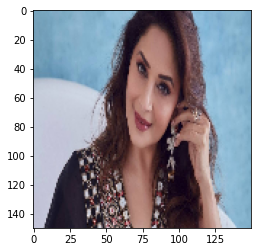

In [146]:
plt.imshow(sample_train_images[9])
plt.show()

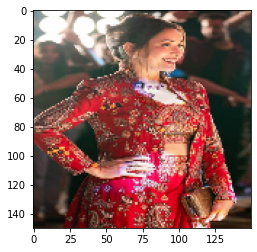

In [150]:
plt.imshow(sample_train_images[3])
plt.show()

In [154]:
label[3]

0.0

In [155]:
label[9]

0.0

In [156]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [157]:
model = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)),
    MaxPooling2D(),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [158]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 20736)            

In [159]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

In [160]:
history = model.fit_generator(train_data_gen,steps_per_epoch=total_train//batch_size,epochs=epochs,
                             validation_data=val_data_gen,validation_steps=total_val//batch_size)

C:\Users\Mamta\anaconda3\envs\deepl\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10


C:\Users\Mamta\anaconda3\envs\deepl\lib\site-packages\keras\backend.py:4994: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


3/3 [==============================] - 4s 1s/step - loss: 2.2985 - accuracy: 0.5333 - val_loss: 1.3789 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 2s 723ms/step - loss: 1.0033 - accuracy: 0.5333 - val_loss: 0.6810 - val_accuracy: 0.7000
Epoch 3/10
3/3 [==============================] - 2s 822ms/step - loss: 0.6407 - accuracy: 0.6333 - val_loss: 0.6618 - val_accuracy: 0.6000
Epoch 4/10
3/3 [==============================] - 3s 846ms/step - loss: 0.5844 - accuracy: 0.7667 - val_loss: 0.6612 - val_accuracy: 0.7000
Epoch 5/10
3/3 [==============================] - 3s 888ms/step - loss: 0.4720 - accuracy: 0.9667 - val_loss: 0.6773 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 3s 839ms/step - loss: 0.3170 - accuracy: 1.0000 - val_loss: 0.7569 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 2s 831ms/step - loss: 0.2608 - accuracy: 0.9000 - val_loss: 0.7967 - val_accuracy: 0.5000
Epoch 8/10
3/3 [==================

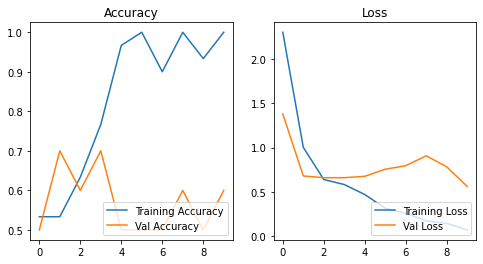

In [161]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val Loss')
plt.legend(loc='lower right')
plt.title('Loss')
plt.show()

In [162]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5)

In [163]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    class_mode='binary')

Found 30 images belonging to 2 classes.


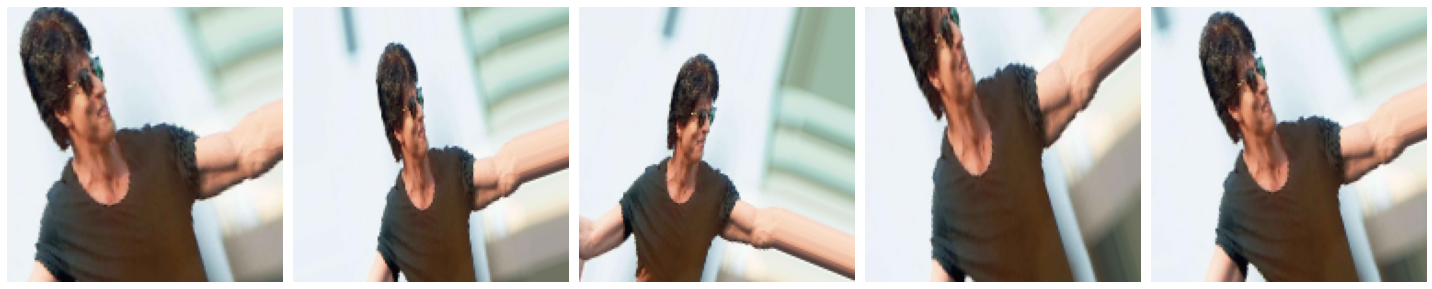

In [164]:
augmented_images = [train_data_gen[0][0][1] for i in range(5)]
plotImages(augmented_images)

In [165]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=validation_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                class_mode='binary')

Found 12 images belonging to 2 classes.


In [166]:
model_new = Sequential([
    Conv2D(12,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(28,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(46,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

In [167]:
model_new.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 12)      336       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 12)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 12)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 28)        3052      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 28)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 37, 37, 28)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 46)       

In [61]:
model_new.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [62]:
history = model_new.fit_generator(train_data_gen,steps_per_epoch=total_train//batch_size,
                                 epochs=25,
                                 validation_data=val_data_gen,
                                 validation_steps=total_val//batch_size)

C:\Users\Mamta\anaconda3\envs\deepl\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
3/3 [==============================] - 10s 3s/step - loss: 0.7191 - accuracy: 0.6667 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/25
3/3 [==============================] - 5s 2s/step - loss: 0.8327 - accuracy: 0.4000 - val_loss: 0.6891 - val_accuracy: 0.5357
Epoch 3/25
3/3 [==============================] - 5s 2s/step - loss: 0.6778 - accuracy: 0.5667 - val_loss: 0.6781 - val_accuracy: 0.5357
Epoch 4/25
3/3 [==============================] - 4s 1s/step - loss: 0.8724 - accuracy: 0.5000 - val_loss: 0.6792 - val_accuracy: 0.5357
Epoch 5/25
3/3 [==============================] - 4s 1s/step - loss: 0.6712 - accuracy: 0.5333 - val_loss: 0.6749 - val_accuracy: 0.5000
Epoch 6/25
3/3 [==============================] - 4s 1s/step - loss: 0.6585 - accuracy: 0.6333 - val_loss: 0.6787 - val_accuracy: 0.5714
Epoch 7/25
3/3 [==============================] - 4s 1s/step - loss: 0.6902 - accuracy: 0.5333 - val_loss: 0.6774 - val_accuracy: 0.5714
Epoch 8/25
3/3 [========================

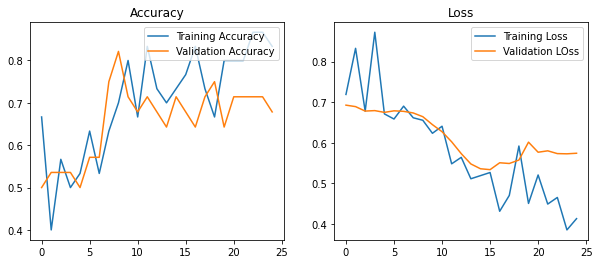

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(25)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [64]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 12)      336       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 12)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 12)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 28)        3052      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 28)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 28)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 46)       

In [168]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

In [169]:
test_1 = load_img('test4.jpg',target_size= (150,150,3))

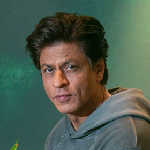

In [170]:
test_1

In [171]:
test_1 = img_to_array(test_1)

In [172]:
test_1.shape

(150, 150, 3)

In [173]:
test_1 = test_1.reshape(1,150,150,3)

In [174]:
test_1.shape

(1, 150, 150, 3)

In [175]:
model_new.predict(test_1)

array([[1.]], dtype=float32)

In [176]:
model_new.predict(test_1).round()

array([[1.]], dtype=float32)

# vgg16

In [177]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [178]:
IMAGE_SIZE = [224,224]

In [179]:
train_path = 'srk_and_madhuri_filtered/train/'
valid_path = 'srk_and_madhuri_filtered/validation/'

In [180]:
train_path

'srk_and_madhuri_filtered/train/'

In [181]:
valid_path

'srk_and_madhuri_filtered/validation/'

In [182]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)#input layer

In [183]:
for layer in vgg.layers:
    layer.trainable = False  #stop training of hidden layers

In [184]:
x = Flatten()(vgg.output)

In [185]:
prediction = Dense(1,activation='sigmoid')(x)

In [186]:
model = Model(inputs=vgg.input,outputs=prediction)

In [187]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [188]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [189]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [190]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [191]:
training_set = train_datagen.flow_from_directory('srk_and_madhuri_filtered/train/',
                                               target_size=(224,224),
                                               batch_size=3,
                                               class_mode='binary')

Found 30 images belonging to 2 classes.


In [192]:
training_set.class_indices

{'madhuri_train': 0, 'srk_train': 1}

In [193]:
test_set = test_datagen.flow_from_directory('srk_and_madhuri_filtered/validation/',
                                           target_size=(224,224),
                                           batch_size=3,
                                           class_mode='binary')

Found 12 images belonging to 2 classes.


In [194]:
history = model.fit_generator(training_set,
                             validation_data=test_set,
                             epochs=5)

C:\Users\Mamta\anaconda3\envs\deepl\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
10/10 [==============================] - 42s 4s/step - loss: 0.9411 - accuracy: 0.5667 - val_loss: 0.8714 - val_accuracy: 0.5833
Epoch 2/5
10/10 [==============================] - 45s 5s/step - loss: 0.5437 - accuracy: 0.7000 - val_loss: 0.8531 - val_accuracy: 0.5000
Epoch 3/5
10/10 [==============================] - 50s 5s/step - loss: 0.2780 - accuracy: 0.8667 - val_loss: 0.5317 - val_accuracy: 0.5833
Epoch 4/5
10/10 [==============================] - 55s 6s/step - loss: 0.1213 - accuracy: 0.9667 - val_loss: 0.3443 - val_accuracy: 0.7500
Epoch 5/5
10/10 [==============================] - 54s 6s/step - loss: 0.0866 - accuracy: 0.9667 - val_loss: 0.1827 - val_accuracy: 1.0000


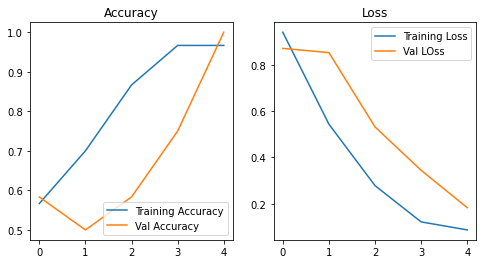

In [195]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(5)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [196]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
data_1 = load_img('srk_and_madhuri_filtered/validation/madhuri_val/madhuri11.jpg',target_size=(224,224))

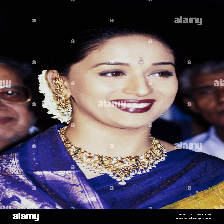

In [197]:
data_1